In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#Aquí cargar archivos
#guardarlos en una lista llamada sujetos
sujetos=[]
for i in range(0,10):
    sujeto_pruebai=np.random.random(500)
    sujetos.append(sujeto_pruebai)

In [ ]:
#Esta casilla es para separar los tipos de mov flexión y extensión según los tiempos.

In [3]:
#operador tkeo
def tkeo(data): 
    x=data*1
    x[1:-1]=np.square(x[1:-1])-np.multiply(x [0:-2],x[2:]) #aplica la función para todos los datos menos el primero y el último, que no es un problema (describir en análisis)
    return x[1:-1]

In [4]:
def rms(x): #x es un array
    x_squared=np.square(x)
    x_mean=np.mean(x_squared)
    xrms=np.sqrt(x_mean)
    return xrms

In [16]:
def caracteristicas(data): 
    caracs={'xrms':'','xvar':'','xmav':'','xmavs':'','xssc':'','xwl':'','xzc':''}
    xrms=rms(data) #root mean square
    caracs['xrms']=xrms
    xvar=np.var(data) #varianza
    caracs['xvar']=xvar
    xmav=np.mean(np.abs(data)) #mean absolute value
    caracs['xmav']=xmav
    xmavs=np.mean(np.abs(np.diff(data))) #mean absolute value slope
    caracs['xmavs']=xmavs
    derivative = np.diff(data)
    xssc = np.sum(np.diff(np.sign(derivative)) != 0) #Slope sign changes
    caracs['xssc']=xssc
    diff_abs = np.abs(np.diff(data))
    xwl = np.sum(diff_abs) #waveform length
    caracs['xwl']=xwl
    xzc = len(np.where(np.diff(np.sign(data)))[0]) #zero crossings
    caracs['xzc']=xzc
    return caracs, [xrms,xvar,xmav,xmavs,xssc,xwl,xzc]

Análisis exploratorio

In [40]:
#calculo de caracteristicas y tkeo de todos los sujetos 
caracs=[]
caracs_sujetos=[]
for sujeto in sujetos:
    sujeto_tkeo=tkeo(sujeto)
    car_sujetos,car=caracteristicas(sujeto_tkeo)
    caracs_sujetos.append(car_sujetos)
    for i in car:
        caracs.append(i)

#esto se debe hacer para movimientos de flexión y extensión

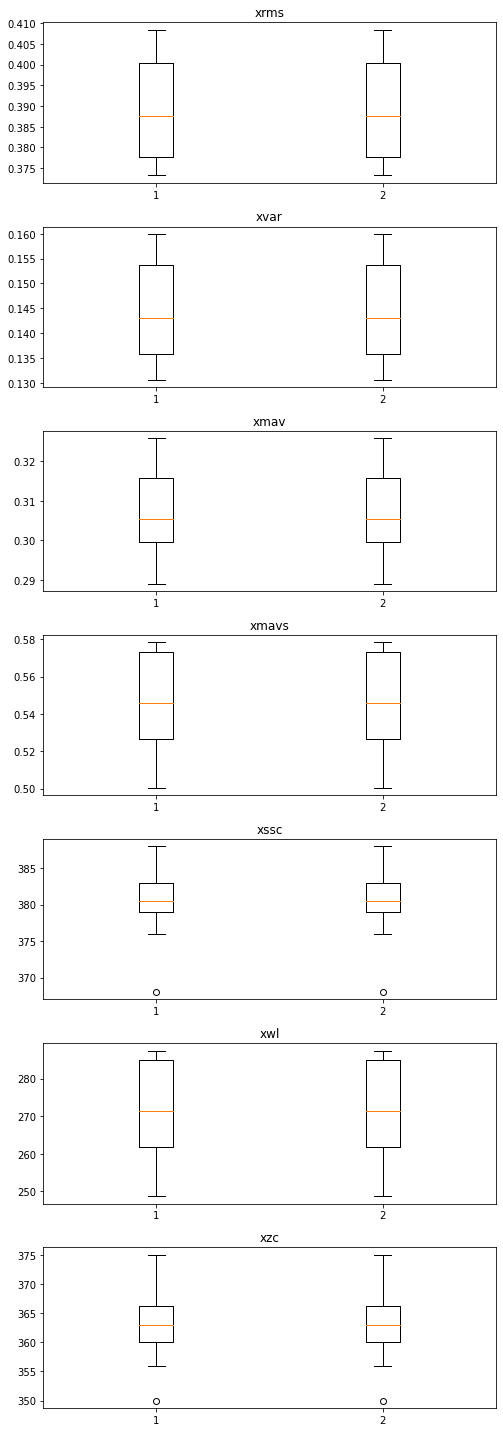

In [65]:
#Graficas
car=np.array(caracs)
car=np.reshape(car,(10,7))
plt.figure(figsize=(7,20))
names=['xrms','xvar','xmav','xmavs','xssc','xwl','xzc']
for i in range(0,7):
    plt.subplot(7,1,i+1)
    plt.boxplot((car[:,i], car[:,i])) #aqui van caracteristicas de flexión y extensión
    plt.title(names[i])
plt.tight_layout()


Pruebas de hipótesis

In [64]:
#esperar datos para saber cuál hacer